<a href="https://colab.research.google.com/github/ezou6/Day_of_AI/blob/main/IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers

In [23]:
iris = load_iris()


In [28]:
features = pd.DataFrame(iris.data)

In [30]:
features.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
features.rename(columns = {0 : "sepal length", 1 : "sepal width", 2 : "petal length", 3: "petal width"})

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
label = pd.DataFrame(iris.target)

In [41]:
label.head()

,0
0,0
1,0
2,0
3,0
4,0


In [42]:
label.rename(columns = {0 : "flower type"})

,flower type
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [43]:
label['setosa'] = (label[0] == 0)*1
label['versicolor'] = (label[0] == 1)*1
label['virginica'] = (label[0] == 2)*1
label = label.drop(columns =[0])

In [44]:
label.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [45]:
X = features.values

In [46]:
y = label.values

In [52]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25, random_state=4)

In [53]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

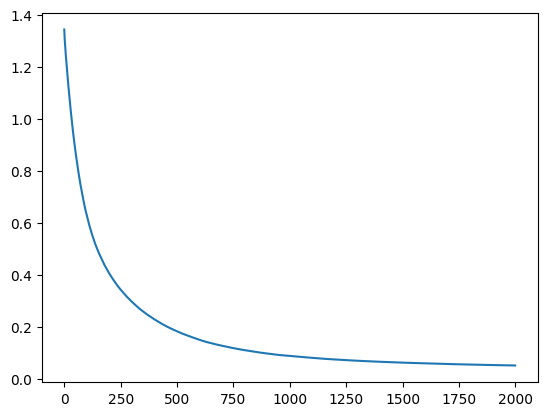

In [56]:
model = 0
model = Sequential()
model.add(Dense(3,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled,y_train,epochs = 2000, verbose = 0, validation_data = (X_val_scaled,y_val))
J_list = model.history.history['loss']
plt.plot(J_list)

In [57]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.343225,0.107143,1.253812,0.105263
1,1.320878,0.116071,1.232163,0.105263
2,1.304789,0.142857,1.215442,0.131579
3,1.290995,0.151786,1.199196,0.184211
4,1.277928,0.151786,1.184088,0.263158
...,...,...,...,...
1995,0.050454,0.991071,0.102343,0.947368
1996,0.050431,0.991071,0.102385,0.947368
1997,0.050448,0.991071,0.102415,0.947368
1998,0.050426,0.991071,0.102337,0.947368


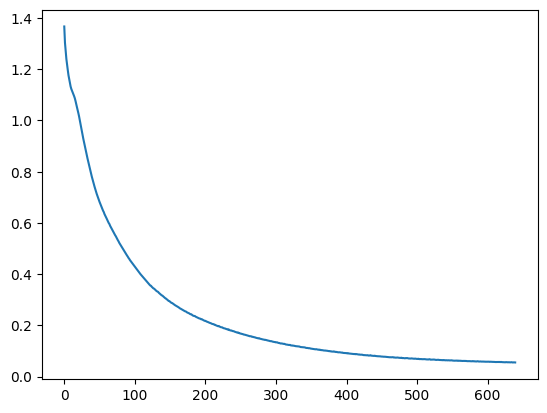

In [58]:
la = 0.001
model = 0
model = Sequential()
model.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(la)))
model.add(Dense(3, activation = 'relu', kernel_regularizer=regularizers.l2(la)))
model.add(Dense(3, activation = 'softmax', kernel_regularizer=regularizers.l2(la)))
model.compile(optimizer='RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled,y_train,epochs = 640, verbose = 0, validation_data = (X_val_scaled,y_val))
J_list = model.history.history['loss']
plt.plot(J_list)

In [59]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.366927,0.258929,1.347999,0.210526
1,1.303275,0.366071,1.299239,0.210526
2,1.268932,0.366071,1.258803,0.210526
3,1.239690,0.383929,1.225734,0.210526
4,1.216186,0.383929,1.201607,0.236842
...,...,...,...,...
635,0.055388,1.000000,0.199972,0.921053
636,0.055110,1.000000,0.202681,0.921053
637,0.055624,1.000000,0.202473,0.921053
638,0.055566,1.000000,0.205344,0.921053
